In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import *

In [21]:
data = get_data_from_matches()

Type the URL from this round BOTAFOGO game:  https://www.sofascore.com/sampaio-correa-rj-botafogo/iOsHcdc#id:11873054
BOTAFOGO is [home] or [away]?  home
Type the URL from this round FLAMENGO game:  https://www.sofascore.com/portuguesa-rj-flamengo/GucsrlIb#id:11873056
FLAMENGO is [home] or [away]?  away
Type the URL from this round FLUMINENSE game:  https://www.sofascore.com/nova-iguacu-fluminense/lOsGOc#id:11873057
FLUMINENSE is [home] or [away]?  home
Type the URL from this round VASCO game:  https://www.sofascore.com/bangu-vasco-da-gama/zOsTO#id:11873052
VASCO is [home] or [away]?  away


In [22]:
ground_filter = data.sort_values('ground_won', ascending=False)
aerial_filter = data.sort_values('aerial_won', ascending=False)
clearence_filter = data.sort_values('clearences', ascending=False)
interceptions_filter = data.sort_values('interceptions', ascending=False)

In [23]:
from matplotlib.offsetbox import OffsetImage,AnnotationBbox

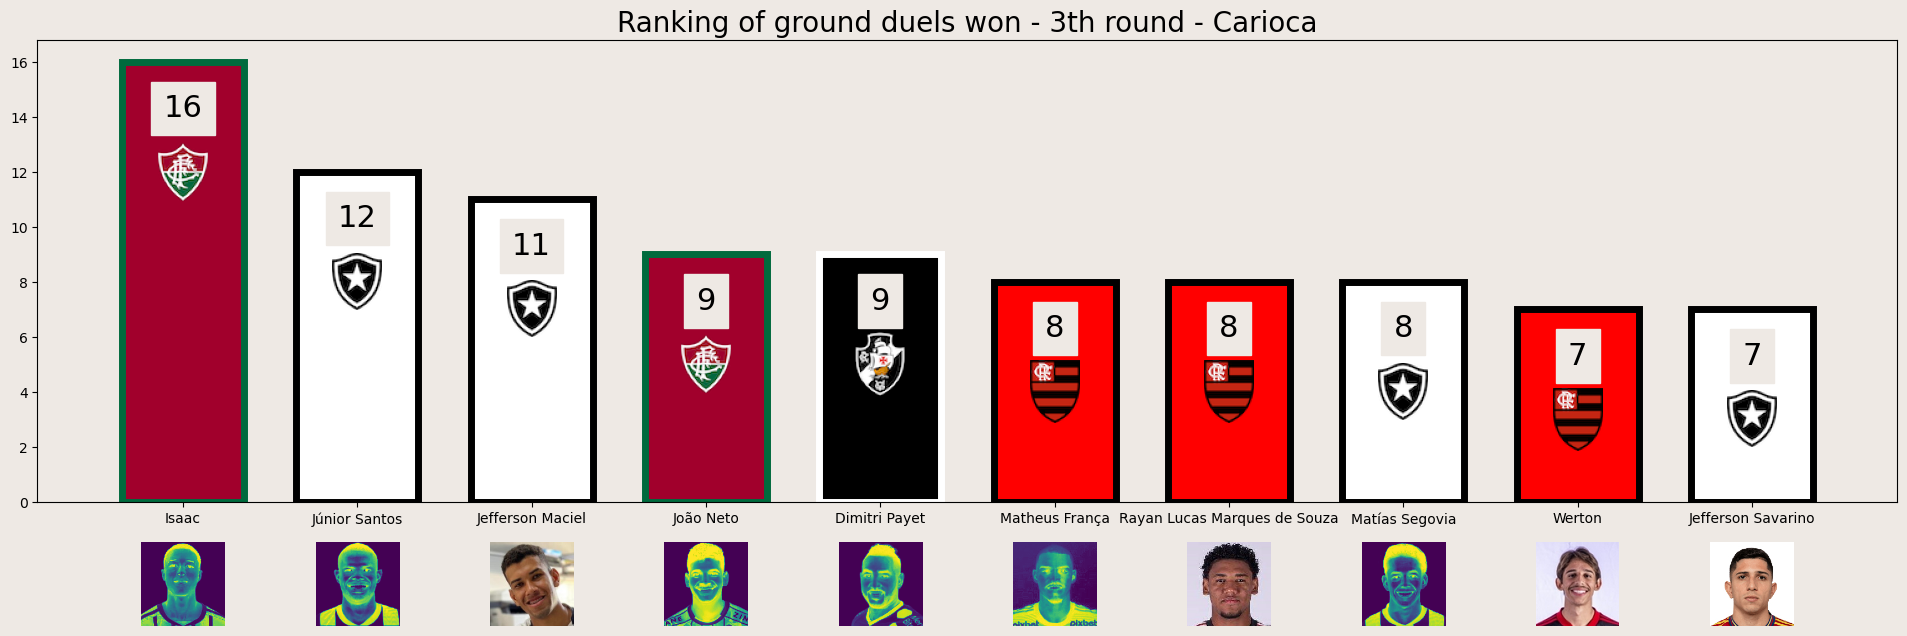

In [54]:
plt.figure(figsize=(24,6), facecolor="#EEE9E4") 
ax = plt.axes()
ax.set_facecolor("#EEE9E4")

plt.bar(
    ground_filter["name"].head(10), ground_filter["ground_won"].head(10),
    color=ground_filter["primary_color"].head(10),
    edgecolor=ground_filter["secondary_color"].head(10),
    width=0.7,
    linewidth=5,
)

for i in range(10):
    valor = ground_filter.iloc[i]['ground_won']
    plt.text(x=i,
             y=valor - 2,
             s = str(valor),
             backgroundcolor='#EEE9E4',
             ha='center',
             fontsize=22,
            )
    img = plt.imread(ground_filter.iloc[i]['badge'])
    im = OffsetImage(img, zoom=0.9)
    im.image.axes = ax
    ab = AnnotationBbox(im, (i, 0),  xybox=(i, valor - 4), frameon=False,
                        xycoords='data', pad=0)
    ax.add_artist(ab)

    avatar = fetch_img(ground_filter.iloc[i]['avatar_url'])
    offset_avatar = OffsetImage(avatar, zoom=0.4)
    offset_avatar.image.axes = ax
    ab = AnnotationBbox(offset_avatar, (i, 0),  xybox=(i, -3), frameon=False,
                        xycoords='data', pad=0)
    ax.add_artist(ab)
    
    
plt.title("Ranking of ground duels won - 3th round - Carioca", fontsize=20)
plt.show()